<a href="https://colab.research.google.com/github/Messagefordorothy/Dorothy-project-Feb-20-2024/blob/main/2024_proposal_Turn_Around_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_excel('/content/Data for Analysis Dec 7.xlsx')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   type                         118 non-null    object        
 1   design                       118 non-null    object        
 2   level                        118 non-null    object        
 3   infonetica number            118 non-null    int64         
 4   IERC Date Approved/Rejected  118 non-null    datetime64[ns]
 5   IERC Total TAT (Months)      118 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.7+ KB


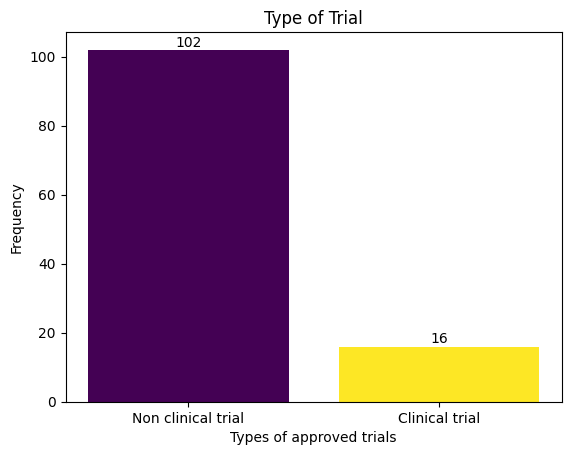

In [22]:

# Calculate frequencies of each category
type_counts = data['type'].value_counts()

# Extract categories and frequencies
categories = type_counts.index.tolist()
frequencies = type_counts.values

# Generate colors for each category
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Create the bar chart
plt.bar(categories, frequencies, color=colors, align='center')
# Labelings
for i, freq in enumerate(frequencies):
    plt.text(categories[i], freq + 0.1, str(freq), ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.xlabel('Types of approved trials')
plt.ylabel('Frequency')
plt.title('Type of Trial')

# Show the plot
plt.show()


During the year 2024, there were 102 non clinical trials and 16 clinical trials.

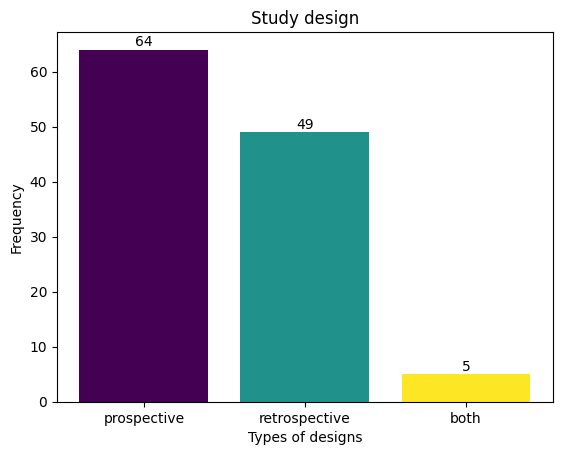

In [24]:
# Calculate frequencies of each category
type_counts = data['design'].value_counts()

# Extract categories and frequencies
categories = type_counts.index.tolist()
frequencies = type_counts.values

# Generate colors for each category
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Create the bar chart
plt.bar(categories, frequencies, color=colors, align='center')
# Labelings
for i, freq in enumerate(frequencies):
    plt.text(categories[i], freq + 0.1, str(freq), ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.xlabel('Types of designs')
plt.ylabel('Frequency')
plt.title('Study design')

# Show the plot
plt.show()


Majority are prospective studies.

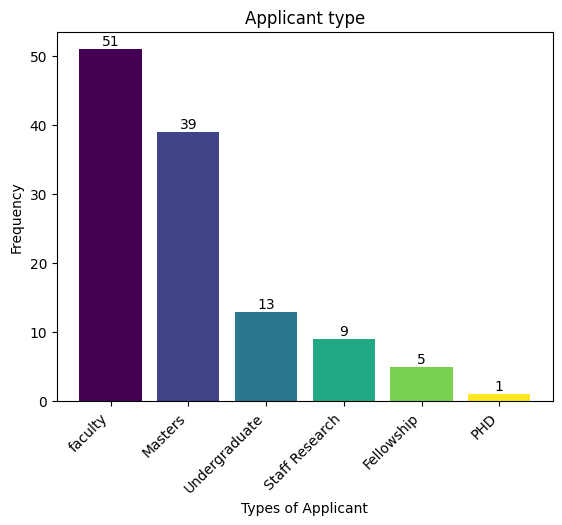

In [27]:
# Calculate frequencies of each category
type_counts = data['level'].value_counts()

# Extract categories and frequencies
categories = type_counts.index.tolist()
frequencies = type_counts.values

# Generate colors for each category
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Create the bar chart
plt.bar(categories, frequencies, color=colors, align='center')
# Labelings
for i, freq in enumerate(frequencies):
    plt.text(categories[i], freq + 0.1, str(freq), ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.xlabel('Types of Applicant')
plt.ylabel('Frequency')
plt.title('Applicant type')
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

There are a total of 69 students proposals  divided into  39, 13, 9, 5 and 1,
There are  51 faculty proposals

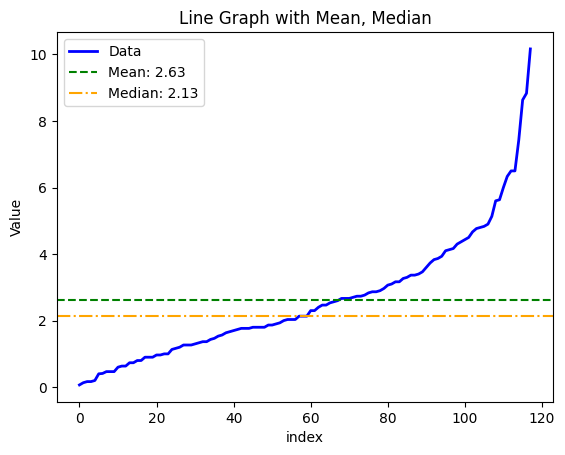

In [34]:
from scipy import stats

# Calculate mean, median, and mode
mean = np.mean(data['IERC Total TAT (Months)'])
median = np.median(data['IERC Total TAT (Months)'])
# Sort data for the line plot
data_sorted = np.sort(data['IERC Total TAT (Months)'])
x_values = range(len(data_sorted))

# Plot the line graph
plt.plot(x_values, data_sorted, label='Data', color='blue', linewidth=2)

# Add lines for mean, median, and mode
plt.axhline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axhline(median, color='orange', linestyle='-.', label=f'Median: {median:.2f}')


# Add labels, title, and legend
plt.xlabel('index')
plt.ylabel('Value')
plt.title('Line Graph with Mean, Median')
plt.legend()

# Show the plot
plt.show()


The turn around time assums a smooth linear curve.
The mean turn around is 2.6 months and median is 2.13

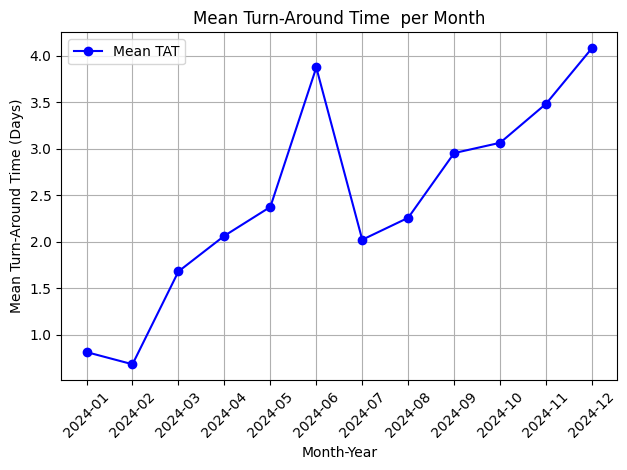

In [33]:
# mean turn around time for clinical trials per month
# calculate mean turn around time of clinical trials per month
# plot a line graph of value against months,
# Extract month-year and group by it
data['month_year'] = data['IERC Date Approved/Rejected'].dt.to_period('M')
mean_tat_per_month = data.groupby('month_year')['IERC Total TAT (Months)'].mean()

# Plotting the mean TAT per month
plt.plot(mean_tat_per_month.index.astype(str), mean_tat_per_month.values, marker='o', color='blue', label='Mean TAT')
plt.xlabel('Month-Year')
plt.ylabel('Mean Turn-Around Time (Days)')
plt.title('Mean Turn-Around Time  per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Month of June and December seems to have a large turn around time.
Least TAT is during the month of Feb
The turn around time increases as the year progresses.
Identify what worked in the month of Feb. It could be that there were few proposals.

<ipython-input-37-6fcd85e160af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['month_year'] = category_data['IERC Date Approved/Rejected'].dt.to_period('M')


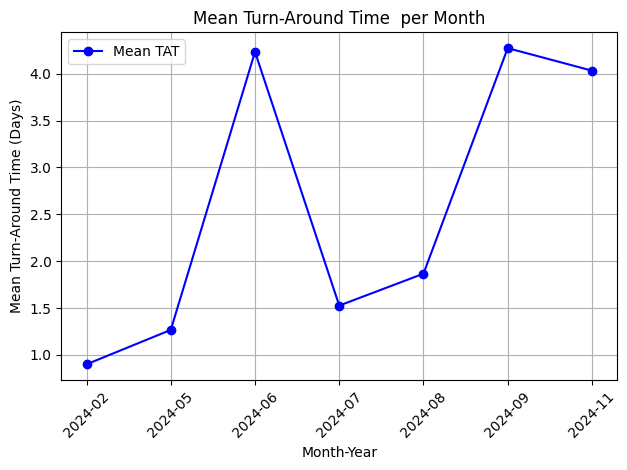

In [37]:
category_data = data[data['type'] == 'Clinical trial']

category_data['month_year'] = category_data['IERC Date Approved/Rejected'].dt.to_period('M')
mean_tat_per_month = category_data.groupby('month_year')['IERC Total TAT (Months)'].mean()
# Plotting the mean TAT per month
plt.plot(mean_tat_per_month.index.astype(str), mean_tat_per_month.values, marker='o', color='blue', label='Mean TAT')
plt.xlabel('Month-Year')
plt.ylabel('Mean Turn-Around Time (Days)')
plt.title('Mean Turn-Around Time  per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This data is affected by a small sample.
Month of June and September seems to have a large turn around time.
Least TAT is during the month of Feb
Identify what worked in the month of Feb. It could be that there were few proposals.

<ipython-input-38-26672f1ddb42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['month_year'] = category_data['IERC Date Approved/Rejected'].dt.to_period('M')


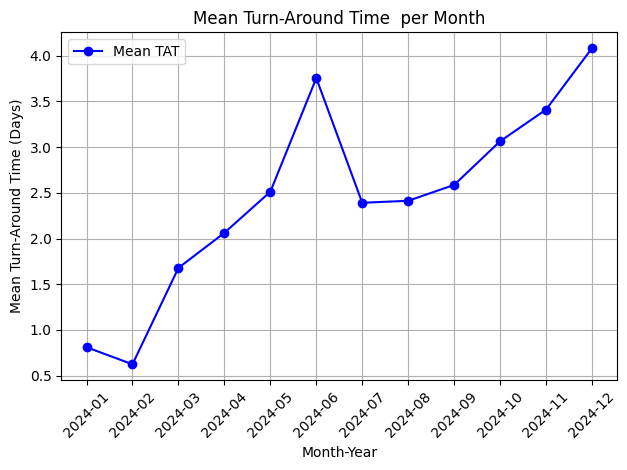

In [38]:
category_data = data[data['type'] == 'Non clinical trial']

category_data['month_year'] = category_data['IERC Date Approved/Rejected'].dt.to_period('M')
mean_tat_per_month = category_data.groupby('month_year')['IERC Total TAT (Months)'].mean()
# Plotting the mean TAT per month
plt.plot(mean_tat_per_month.index.astype(str), mean_tat_per_month.values, marker='o', color='blue', label='Mean TAT')
plt.xlabel('Month-Year')
plt.ylabel('Mean Turn-Around Time (Days)')
plt.title('Mean Turn-Around Time  per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Month of June and December seems to have a large turn around time.
Least TAT is during the month of Feb
The turn around time increases as the year progresses.
Identify what worked in the month of Feb. It could be that there were few proposals.
